# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [1]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "5">

Install the "statsmodels" library

```conda install statsmodels```

- In Windows, you can do this by opening the program  <br> "anaconda
prompt" and typing the above command.
- In Mac, you can open your terminal and <br>
type the above command

In [2]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [3]:
dataset = pd.DataFrame()

<font size = "5">

Create two random variables of size ($n = 50$)

In [4]:
n = 50
np.random.seed(42)
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)

<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [5]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

In [6]:
dataset['y']

0     2.317512
1     0.338389
2     1.618455
3     4.657736
4     1.562693
5     1.463006
6     3.319208
7     2.225657
8     0.392315
9     3.060665
10   -0.406010
11   -0.117118
12    0.377590
13   -4.022767
14   -1.637310
15    1.231665
16   -1.097672
17    2.632028
18   -0.454412
19   -2.469727
20    4.292693
21    2.086484
22    1.099230
23   -0.284853
24   -2.708511
25    2.043748
26   -1.214940
27    1.452389
28   -0.109517
29   -1.570956
30   -0.423085
31    5.061669
32    2.450900
33   -1.633692
34    1.836596
35   -1.943444
36    2.333129
37   -2.590589
38   -2.186132
39    1.906990
40    2.574011
41    2.311382
42    0.066650
43    0.070130
44   -2.349152
45   -1.903203
46    0.374843
47    3.375300
48    1.692350
49   -2.760667
Name: y, dtype: float64

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [7]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

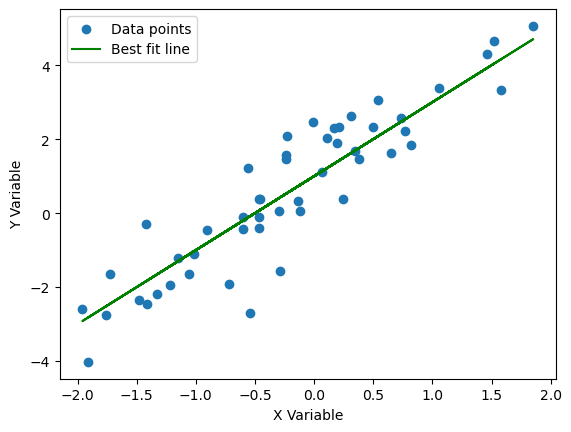

In [8]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.plot(dataset["x"],dataset["p"], color = 'green')

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- Subset records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [22]:
# Write your own code here

subset_above2 = dataset.query("y>=2")
print(len(dataset))
print(len(subset_above2))
print(len(subset_above2)/len(dataset))


50
15
0.3


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [27]:
# Note: abs(...) is the absolute value function
# Write your own code 

ybar = dataset["y"].mean()
stdv_sample = dataset["y"].std()
subset = dataset.query("abs(y-@ybar)<=@stdv_sample")
print(subset)
print(len(subset))


           x         e         y         p
0   0.496714  0.324084  2.317512  1.993428
1  -0.138264 -0.385082  0.338389  0.723471
2   0.647689 -0.676922  1.618455  2.295377
4  -0.234153  1.031000  1.562693  0.531693
5  -0.234137  0.931280  1.463006  0.531726
7   0.767435 -0.309212  2.225657  2.534869
8  -0.469474  0.331263  0.392315  0.061051
10 -0.463418 -0.479174 -0.406010  0.073165
11 -0.465730 -0.185659 -0.117118  0.068540
12  0.241962 -1.106335  0.377590  1.483925
15 -0.562288  1.356240  1.231665 -0.124575
16 -1.012831 -0.072010 -1.097672 -1.025662
17  0.314247  1.003533  2.632028  1.628495
18 -0.908024  0.361636 -0.454412 -0.816048
21 -0.225776  1.538037  2.086484  0.548447
22  0.067528 -0.035826  1.099230  1.135056
23 -1.424748  1.564644 -0.284853 -1.849496
25  0.110923  0.821903  2.043748  1.221845
26 -1.150994  0.087047 -1.214940 -1.301987
27  0.375698 -0.299007  1.452389  1.751396
28 -0.600639  0.091761 -0.109517 -0.201277
29 -0.291694 -1.987569 -1.570956  0.416613
30 -0.60170

# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1, e)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [31]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model = smf.ols(formula = 'y ~  x', data = dataset)
results = model.fit()

results

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [32]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.041022
x            2.103076
dtype: float64


<font size = "5">

Plot the best fit line

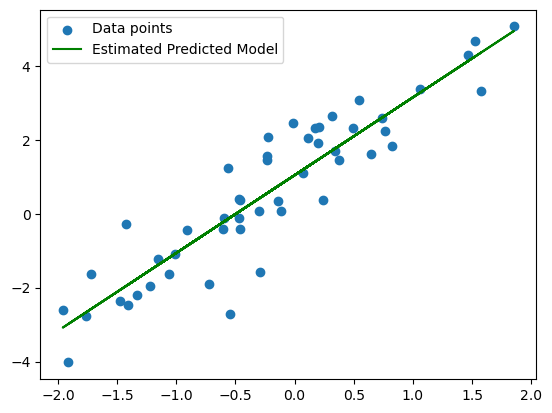

In [33]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.plot(dataset["x"],dataset["p_estimated"], color = 'green')

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping lineplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

In [14]:
# Write your own code



<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error = lambda error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [15]:
# Write your own code


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [16]:
# Write your own code


181.5508387723178
              Known As           Full Name  Overall  Potential  \
1           K. Benzema       Karim Benzema       91         91   
2       R. Lewandowski  Robert Lewandowski       91         91   
4            K. Mbappé       Kylian Mbappé       91         95   
6          T. Courtois    Thibaut Courtois       90         91   
7             M. Neuer        Manuel Neuer       90         90   
...                ...                 ...      ...        ...   
18520          N. Deka         Nikhil Deka       48         61   
18521         V. Yadav        Vishal Yadav       48         62   
18524       A. Brînzea      Andreș Brînzea       48         72   
18525  J. Russell-Rowe  Jacen Russell-Rowe       48         65   
18528        Zhang Yue           Yue Zhang       48         56   

       Value(in Euro) Positions Played Best Position Nationality  \
1            64000000            CF,ST            CF      France   
2            84000000               ST            ST 

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,joined_after2016
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,Joined on 2016 or after
21,E. Haaland,Erling Haaland,88,94,148000000,ST,ST,Norway,https://cdn.sofifa.net/players/239/085/23_60.png,21,...,3,3,4,Norway,https://cdn.sofifa.net/flags/no.png,ST,9,High,Medium,Joined on 2016 or after
42,F. de Jong,Frenkie de Jong,87,92,116500000,CM,CM,Netherlands,https://cdn.sofifa.net/players/228/702/23_60.png,25,...,3,4,3,Netherlands,https://cdn.sofifa.net/flags/nl.png,CDM,21,High,Medium,Joined on 2016 or after
82,Pedri,Pedro González López,85,93,116000000,CM,CM,Spain,https://cdn.sofifa.net/players/251/854/23_60.png,19,...,4,4,2,Spain,https://cdn.sofifa.net/flags/es.png,CM,10,High,High,Joined on 2016 or after
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,3,4,4,-,-,-,-,High,Medium,Joined on 2016 or after


537721853
696928.52
353393885


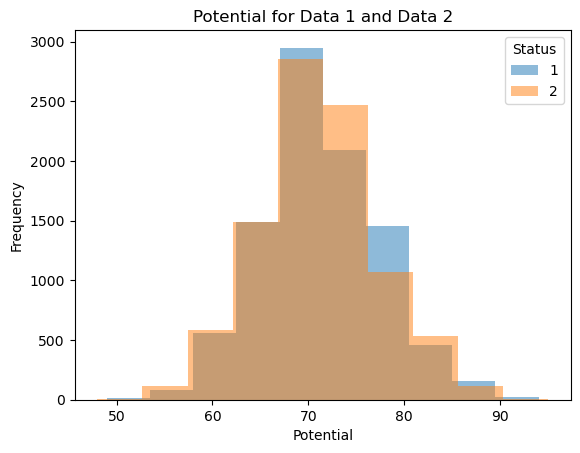

In [41]:
fifa_data = pd.read_csv('/Users/jeffechols8/Downloads/assignment6/Data/fifa23_players_basic.csv')

def fn_yearjoined(year):
    if (year < 2016):
        status = "Joined before 2016"
    elif (year >= 2016):
        status = "Joined on 2016 or after"
    return status

fifa_data["joined_after2016"] = fifa_data["Joined On"].apply(fn_yearjoined)

mean_height = fifa_data["Height(in cm)"].mean()
above_mean_height = fifa_data.query("`Height(in cm)` > @mean_height")
print(mean_height)
print(above_mean_height)

highest_value = fifa_data.sort_values(by= "Value(in Euro)", ascending = False)
display(highest_value.iloc[0:5,:])


def fn_rss(y,x,b0,b1):
    e2 = (y-b0-b1*x)**2
    return (e2).sum()


y = fifa_data["Overall"] 
x = fifa_data["Age"] 

print(fn_rss(y,x,50,-6))
print(fn_rss(y,x,50,0.6))
print(fn_rss(y,x,50,6))

list_status = [1,2]
list_prob = [0.5,0.5]
n = len(fifa_data)

fifa_data["status"] = np.random.choice(list_status, size = n, p=list_prob)
data1 = fifa_data.query('status== "1"')
data2 = fifa_data.query('status== "2"')

unique_status = pd.unique(fifa_data["status"])

for category in unique_status:
    dataframe = fifa_data.query("status == @category")
    plt.hist(dataframe["Potential"], alpha = 0.5)

plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.legend(labels = unique_status,
           title  = "Status")
plt.title("Potential for Data 1 and Data 2")
plt.show()
